# Chennai has around 1 crore population with less than 2000 liters of water per person available in its reservoirs

In [149]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [150]:
sns.set_context('talk')
matplotlib.rcParams['font.family'] = 'arial'

In [162]:
df_water = pd.read_csv("../data/chennai_reservoir_levels.csv")
df_water["Date"] = pd.to_datetime(df_water["Date"], format='%d-%m-%Y')
df_water["TOTAL_RESERVOIR"] = df_water["POONDI"] + df_water["CHOLAVARAM"] + df_water["REDHILLS"] + df_water["CHEMBARAMBAKKAM"]
cols = ["Date", "TOTAL_RESERVOIR"]
df_water = df_water[cols]

df_rainfall = pd.read_csv("../data/chennai_reservoir_rainfall.csv")
df_rainfall["Date"] = pd.to_datetime(df_rainfall["Date"], format='%d-%m-%Y')
df_rainfall["AVG_RAINFALL"] = 0.25*(df_rainfall["POONDI"] + df_rainfall["CHOLAVARAM"] + df_rainfall["REDHILLS"] + df_rainfall["CHEMBARAMBAKKAM"])
cols = ["Date", "AVG_RAINFALL"]
df_rainfall = df_rainfall[cols]

# http://worldpopulationreview.com/world-cities/chennai-population/
df_population = pd.read_csv("../data/chennai_population.csv")
cols = ["Year", "Population"]
df_population = df_population[cols]

df = pd.merge(df_water, df_rainfall, left_on='Date', right_on='Date')

df["Year"] = df["Date"].dt.year

# 1 mcft = 28316846.6 liters
df["TOTAL_RESERVOIR"] *= 28316846.6
df.set_index("Date", inplace=True)
df.tail(10)

,TOTAL_RESERVOIR,AVG_RAINFALL,Year
Date,,,
2019-06-08,1.245941e+09,0.0,2019
2019-06-09,1.189308e+09,0.0,2019
2019-06-10,1.076040e+09,0.0,2019
2019-06-11,1.019406e+09,0.0,2019
2019-06-12,9.627728e+08,0.0,2019
2019-06-13,8.778222e+08,0.0,2019
2019-06-14,8.211886e+08,0.0,2019
2019-06-15,7.928717e+08,0.0,2019
2019-06-16,7.645549e+08,0.0,2019


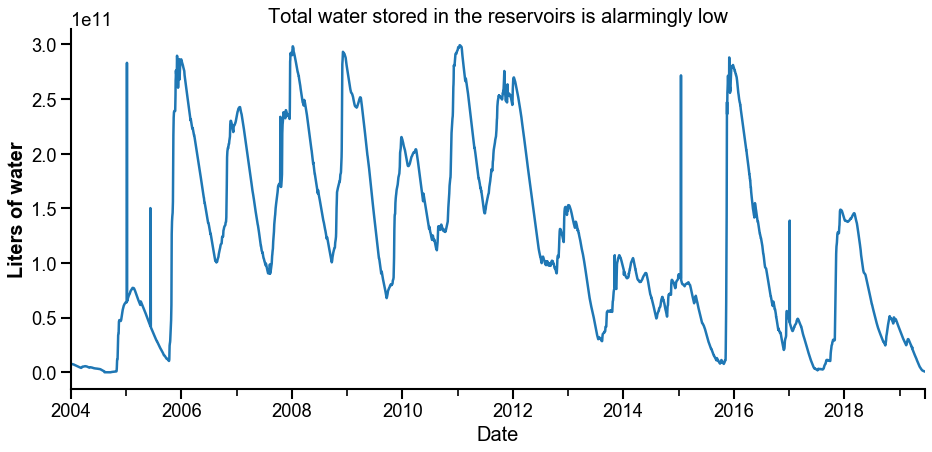

In [163]:
fig = figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

ax = df["TOTAL_RESERVOIR"].plot()
# ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Liters of water', weight = 'bold')
ax.set_title('Total water stored in the reservoirs is alarmingly low')

sns.despine()
plt.tight_layout();

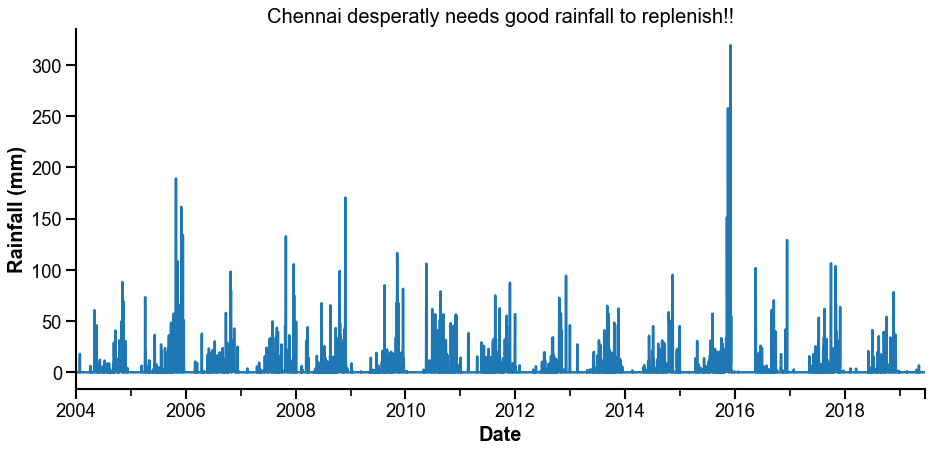

In [164]:
fig = figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

ax = df["AVG_RAINFALL"].plot()
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Rainfall (mm)', weight = 'bold')
ax.set_title('Chennai desperatly needs good rainfall to replenish!!')

sns.despine()
plt.tight_layout();

In [166]:
df.tail()

,TOTAL_RESERVOIR,AVG_RAINFALL,Year
Date,,,
2019-06-13,877822244.6,0.0,2019
2019-06-14,821188551.4,0.0,2019
2019-06-15,792871704.8,0.0,2019
2019-06-16,764554858.2,0.0,2019
2019-06-17,736238011.6,0.0,2019


In [178]:
df_agg = pd.DataFrame(df.groupby("Year").agg({"TOTAL_RESERVOIR": "mean"})).reset_index()
df_year = pd.merge(df_agg, df_population, left_on='Year', right_on='Year')

df_year["LITERS_PER_PERSON"] = df_year["TOTAL_RESERVOIR"] / df_year["Population"]

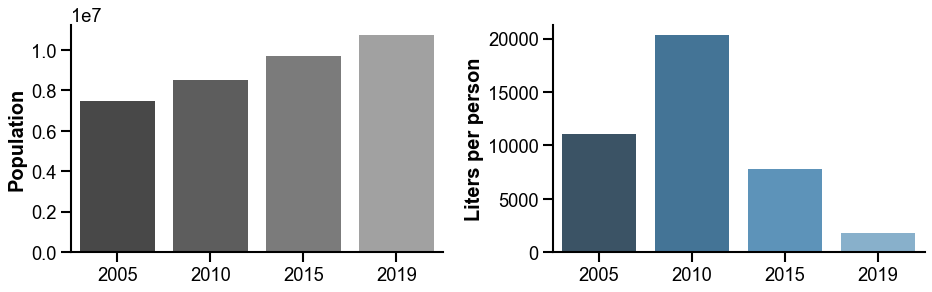

In [184]:
fig = figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y="Population", x="Year", data=df_year, palette=("Greys_d"))
ax1.set_xlabel('')
ax1.set_ylabel('Population', weight = 'bold')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y="LITERS_PER_PERSON", x="Year", data=df_year, palette=("Blues_d"))
ax2.set_xlabel('')
ax2.set_ylabel('Liters per person', weight = 'bold')

sns.despine()
plt.tight_layout();

In [185]:
df_year

,Year,TOTAL_RESERVOIR,Population,LITERS_PER_PERSON
0,2005,8.269307e+10,7476986,11059.680022
1,2010,1.727178e+11,8506193,20304.946201
2,2015,7.554783e+10,9677072,7806.889719
3,2019,1.918567e+10,10711243,1791.171658
